# Создаем новые переменные

In [6]:
import pandas as pd

bikes = pd.read_csv('Data/BikeData.csv')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38


In [7]:
bikes['Rental Count'] = bikes['Partner 1'] + bikes['Partner 2']

In [3]:
pd.to_datetime(bikes['Date']).dt.month

0        1
1        1
2        1
3        1
4        1
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int64

In [4]:
pd.to_datetime(bikes['Date'], dayfirst=True).dt.month

0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int64

In [8]:
bikes['Date'] = pd.to_datetime(bikes['Date'], dayfirst=True)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Hour             8760 non-null   int64         
 2   Temperature      8581 non-null   float64       
 3   Humidity         8760 non-null   int64         
 4   Wind speed       8760 non-null   float64       
 5   Rainfall         8760 non-null   float64       
 6   Snowfall         8760 non-null   float64       
 7   Seasons          8760 non-null   object        
 8   Holiday          8760 non-null   object        
 9   Functioning Day  8760 non-null   object        
 10  Partner 1        8760 non-null   int64         
 11  Partner 2        8760 non-null   int64         
 12  Rental Count     8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 889.8+ KB


In [10]:
bikes['Date'].dt.month

0       12
1       12
2       12
3       12
4       12
        ..
8755    11
8756    11
8757    11
8758    11
8759    11
Name: Date, Length: 8760, dtype: int64

In [11]:
bikes['Date'].dt.year

0       2017
1       2017
2       2017
3       2017
4       2017
        ... 
8755    2018
8756    2018
8757    2018
8758    2018
8759    2018
Name: Date, Length: 8760, dtype: int64

In [12]:
bikes[bikes['Date'].dt.year == 2017].shape

(744, 13)

In [13]:
bikes[bikes['Date'].dt.year == 2018].shape

(8016, 13)

In [14]:
bikes['Date'].dt.day_name()

0       Friday
1       Friday
2       Friday
3       Friday
4       Friday
         ...  
8755    Friday
8756    Friday
8757    Friday
8758    Friday
8759    Friday
Name: Date, Length: 8760, dtype: object

In [15]:
bikes[bikes['Date'].dt.day_name() == 'Sunday'].shape

(1248, 13)

In [16]:
bikes['Functioning Day'] = bikes['Functioning Day'] == 'Yes'

### Вспоминаем про функции

In [17]:
def currency_converter(rub):
    return round(rub / 74.73,2)

currency_converter(1000)

13.38

In [21]:
amounts = [1000, 2000, 4214, 12321]

print(list(map(currency_converter, amounts)))
print(list(map(lambda x: round(x / 74.73,2), amounts)))
print(list(map(lambda x: 0 if x < 3000 else 1, amounts)))

[13.38, 26.76, 56.39, 164.87]
[13.38, 26.76, 56.39, 164.87]
[0, 0, 1, 1]


In [22]:
bikes['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0).sum()

432

In [23]:
bikes[bikes['Holiday'] == 'Holiday'].shape

(432, 13)

In [24]:
bikes['Holiday'] = bikes['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)

In [25]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2,Rental Count
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,207,50,257
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,139,80,219
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,22,140,162
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,43,105,148
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,59,38,97


In [29]:
bikes['Normal Humidity'] = bikes['Humidity'].apply(lambda x: 1 if x in range(40, 61) else 0)

In [30]:
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 15:
        return 'Chilly'
    elif temp < 26:
        return 'Nice'
    elif temp >= 26:
        return 'Hot'
    else:
        return temp

In [31]:
bikes['Temperature Category'] = bikes['Temperature'].apply(get_temp_cat)

In [32]:
bikes[['Temperature Category', 'Temperature']].tail()

,Temperature Category,Temperature
8755,Chilly,4.2
8756,Chilly,3.4
8757,Chilly,2.6
8758,Chilly,2.1
8759,Chilly,1.9


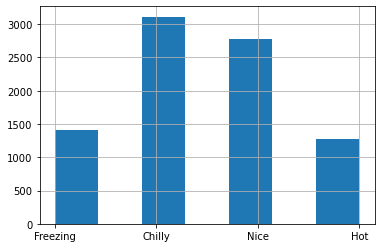

In [38]:
bikes['Temperature Category'].hist(bins=7);

In [41]:
bikes['Temperature Category'] = pd.Categorical(bikes['Temperature Category'])

In [42]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Partner 1             8760 non-null   int64         
 11  Partner 2             8760 non-null   int64         
 12  Rental Count          8760 non-null   int64         
 13  Normal Humidity   

In [43]:
bikes['Temperature Category'].cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
8755    0
8756    0
8757    0
8758    0
8759    0
Length: 8760, dtype: int8

In [50]:
bikes['Temperature Category'].cat.categories

Index(['Chilly', 'Freezing', 'Hot', 'Nice'], dtype='object')

In [51]:
import numpy as np

bikes['Good Weather'] = np.where(
    (bikes['Temperature Category'] == 'Nice') &
    (bikes['Normal Humidity'] == 1) &
    (bikes['Wind speed'] <= 5.4) &
    (bikes['Snowfall'] == 0) &
    (bikes['Rainfall'] == 0), 1, 0)

In [52]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Partner 1             8760 non-null   int64         
 11  Partner 2             8760 non-null   int64         
 12  Rental Count          8760 non-null   int64         
 13  Normal Humidity   

In [53]:
bikes = bikes.drop('Partner 1', axis=1)

In [54]:
del bikes['Partner 2']

In [55]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good Weather      

In [56]:
bikes.to_pickle('Data/BikesDataVars.pkl')

In [57]:
bikes.to_csv('Data/BikesDataVars.csv', index=False)
bikes.to_excel('Data/BikesDataVars.xlsx', index=False)

In [58]:
df_pkl = pd.read_pickle('Data/BikesDataVars.pkl')

In [59]:
df_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good Weather      

In [60]:
df_csv = pd.read_csv('Data/BikesDataVars.csv')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8760 non-null   object 
 1   Hour                  8760 non-null   int64  
 2   Temperature           8581 non-null   float64
 3   Humidity              8760 non-null   int64  
 4   Wind speed            8760 non-null   float64
 5   Rainfall              8760 non-null   float64
 6   Snowfall              8760 non-null   float64
 7   Seasons               8760 non-null   object 
 8   Holiday               8760 non-null   int64  
 9   Functioning Day       8760 non-null   bool   
 10  Rental Count          8760 non-null   int64  
 11  Normal Humidity       8760 non-null   int64  
 12  Temperature Category  8581 non-null   object 
 13  Good Weather          8760 non-null   int64  
dtypes: bool(1), float64(4), int64(6), object(3)
memory usage: 898.4+ KB


In [61]:
df_xlsx = pd.read_excel('Data/BikesDataVars.xlsx', index_col=False)
df_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   object        
 13  Good Weather      